Pipeline classification
- get problem
- get data
- extract feature
- splite data set, train set/test set
- train model
- test model(evaluation metrics)
- deploy model

Metrics
- TP/FP/TN/FN
- tp_rate
- fp_rate
- roc_curve
- auc
- precision
- recall
- pr_curve
- ap
- f1
- confusion_metrics

## Download Data

In [1]:
!nvidia-smi

Thu Dec  2 09:33:42 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P8    35W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!gdown --id 1Hze9C7RX8v7Uzo8ib4haue3NVKXnRnZH

Downloading...
From: https://drive.google.com/uc?id=1Hze9C7RX8v7Uzo8ib4haue3NVKXnRnZH
To: /content/label_new_add_more_pic.zip
100% 664M/664M [00:06<00:00, 104MB/s]


In [3]:
!mkdir data1

In [4]:
!unzip /content/label_new_add_more_pic.zip -d data1

Archive:  /content/label_new_add_more_pic.zip
   creating: data1/bag/
  inflating: data1/bag/0201001(1).jpg  
  inflating: data1/bag/0201001-2.jpg  
  inflating: data1/bag/0201001-3.jpg  
  inflating: data1/bag/0201001.jpg   
  inflating: data1/bag/0201002-2.jpg  
  inflating: data1/bag/0201002.jpg   
  inflating: data1/bag/0201005(1).jpg  
  inflating: data1/bag/0201005-2.jpg  
  inflating: data1/bag/0201005-3(1).jpg  
  inflating: data1/bag/0201005-3.jpg  
  inflating: data1/bag/0201005-4.jpg  
  inflating: data1/bag/0201005.jpg   
  inflating: data1/bag/0201006(1).jpg  
  inflating: data1/bag/0201006-2.jpg  
  inflating: data1/bag/0201006-3.jpg  
  inflating: data1/bag/0201006.jpg   
  inflating: data1/bag/0201007(1).jpg  
  inflating: data1/bag/0201007-2.jpg  
  inflating: data1/bag/0201007-3.jpg  
  inflating: data1/bag/0201007-4.jpg  
  inflating: data1/bag/0201007.jpg   
  inflating: data1/bag/0201008-2.jpg  
  inflating: data1/bag/0201008-3.jpg  
  inflating: data1/bag/0201008-

## Prepare file csv

In [5]:
import os
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [6]:
os.listdir('/content/data1')

['coasters',
 'crape',
 'bag',
 'plates',
 'box_hand',
 'bowl',
 'foil',
 'box',
 'envelope']

In [8]:
cls_name = os.listdir('/content/data1')
# for i in cls_name:


In [14]:
path = "/content/data1"

img_path = []

for (path, dirs, files) in os.walk(path):
  for img in files:
    img_path.append(img)

len(img_path)

3119

In [ ]:
cls_name = os.listdir('/content/data1')
list_path = []
list_cls = []

for idx, cls in enumerate(cls_name):
  path = os.listdir('/content/data1/' + cls)
  for i in range(len(path)):
    list_path.append(cls + '/'+path[i])
    list_cls.append(cls)

dictionary = dict.fromkeys(['path','cls'])
dictionary['path'] = list_path
dictionary['cls'] = list_cls
df = pd.DataFrame.from_dict(dictionary)
df

,path,cls
0,plates/0821001-2(1).jpg,plates
1,plates/0813001-3.jpg,plates
2,plates/0808057.jpg,plates
3,plates/0822005.jpg,plates
4,plates/0808106-2(1).jpg,plates
...,...,...
3114,bag/0204007-3(1).jpg,bag
3115,bag/0213003-2.jpg,bag
3116,bag/0202014(1).gif,bag
3117,bag/1416008.jpg,bag


In [ ]:
check_format = df['path'].str.rsplit(".", n=1, expand=True)
check_format[1].value_counts()

jpg    3081
gif      38
Name: 1, dtype: int64

In [ ]:
df = df[df['path'].str.contains(".jpg")]
df = df.reset_index(drop=True)
df

,path,cls
0,plates/0821001-2(1).jpg,plates
1,plates/0813001-3.jpg,plates
2,plates/0808057.jpg,plates
3,plates/0822005.jpg,plates
4,plates/0808106-2(1).jpg,plates
...,...,...
3076,bag/1805001-2.jpg,bag
3077,bag/0204007-3(1).jpg,bag
3078,bag/0213003-2.jpg,bag
3079,bag/1416008.jpg,bag


box_hand    665
box         500
bag         487
coasters    388
plates      368
bowl        200
foil        176
envelope    169
crape       128
Name: cls, dtype: int64


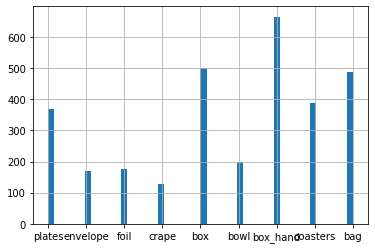

In [ ]:
df['cls'].hist(bins = 50)
print(df['cls'].value_counts())

## Visualize

In [ ]:
import cv2
import matplotlib.pyplot as plt
import random
#@title After running this cell manually, it will auto-run if you change the selected value. { run: "auto" }
shuffle_img = True #@param {type:"boolean"}
columns = 5 #@param {type:"slider", min:2, max:6, step:1}
row = 5 #@param {type:"slider", min:2, max:50, step:1}
start_photo = 0 #@param {type:"slider", min:0, max:200, step:1}
dropdown = 'box' #@param ['bag','box','foil', 'coasters', 'box_hand', 'envelope', 'crape', 'bowl', 'plates']

df_show = df[df['cls'] == dropdown]
path_file = df_show['path'].tolist()
photo = path_file[start_photo:]



if shuffle_img == True:
  random.shuffle(photo)
else:
  pass



try:
  fig, ax = plt.subplots(row, columns, figsize=(columns * 5 , row * 4))
  num = 0

  for i in range(row):
      for j in range(columns):
    
          
          image = cv2.imread('/content/data1/' + photo[num])
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

          ax[i][j].imshow(image)
      

          
          num = num + 1
except:
  print(photo[num])
  print('Please re-setting')
  pass

Output hidden; open in https://colab.research.google.com to view.

## prepare data to model

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val = train_test_split(df, test_size=0.20, random_state=42)
x_train = x_train.reset_index(drop=True)
x_val = x_val.reset_index(drop=True)

In [ ]:
IMAGE_WIDTH=224
IMAGE_HEIGHT=224
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3



total_train = x_train.shape[0]
total_validate = x_val.shape[0]
batch_size = 64 # ---> 8,16,32,64,128

In [ ]:
x_train

,path,cls
0,box_hand/0603011-5.jpg,box_hand
1,box/0101012-2.jpg,box
2,coasters/0803007(1).jpg,coasters
3,plates/0808058-2.jpg,plates
4,plates/0808077-2.jpg,plates
...,...,...
2459,box_hand/0406014-2.jpg,box_hand
2460,box/0102015(1).jpg,box
2461,box/0102022-9.jpg,box
2462,box/0101021-4.jpg,box


In [ ]:
from keras_preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(

    rescale=1./255,
    # preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    horizontal_flip=True,

)




train_generator = train_datagen.flow_from_dataframe(
    x_train,
    "./data1", 
    x_col='path',
    y_col='cls',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size,

    shuffle=False,
    seed=99
)

Found 2464 validated image filenames belonging to 9 classes.


In [ ]:
validation_datagen = ImageDataGenerator(
    
    rescale=1./255,
    # preprocessing_function=tf.keras.applications.vgg16.preprocess_input
    
    )

validation_generator = validation_datagen.flow_from_dataframe(
    x_val, 
    "./data1", 
    x_col='path',
    y_col='cls',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size,

    shuffle=False,
    seed=99
)

Found 617 validated image filenames belonging to 9 classes.


In [ ]:
example_df = x_train.sample(n=1).reset_index(drop=True)

example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "./data1", 
    x_col='path',
    y_col='cls',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


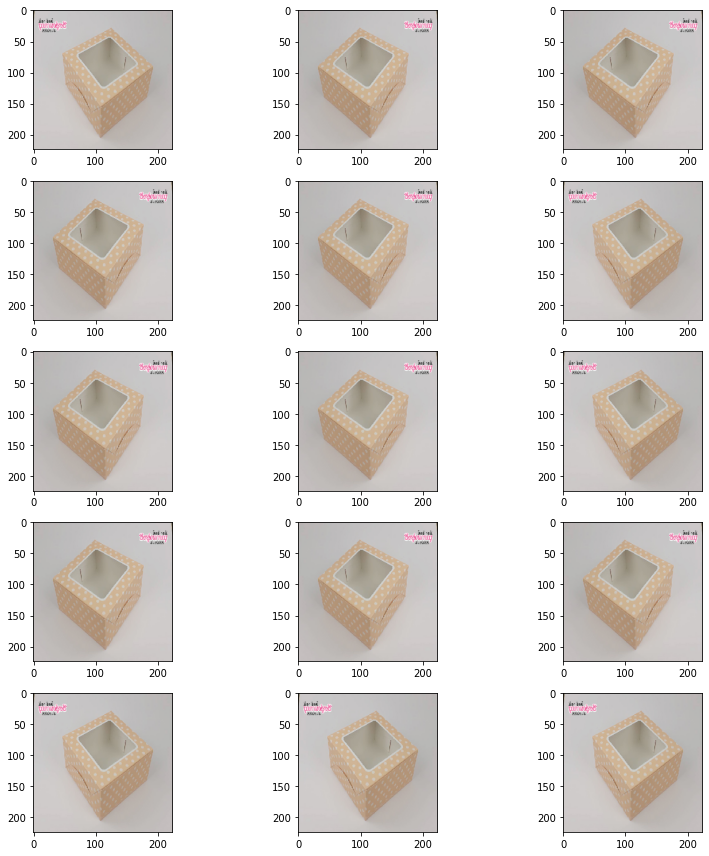

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [ ]:
print(train_generator.class_indices)
pd.DataFrame(train_generator.class_indices.items(), columns =['cls', 'idx'])


{'bag': 0, 'bowl': 1, 'box': 2, 'box_hand': 3, 'coasters': 4, 'crape': 5, 'envelope': 6, 'foil': 7, 'plates': 8}


,cls,idx
0,bag,0
1,bowl,1
2,box,2
3,box_hand,3
4,coasters,4
5,crape,5
6,envelope,6
7,foil,7
8,plates,8


In [ ]:
### Class weight
df_cls = pd.DataFrame(data = df['cls'].value_counts())
df_cls = df_cls.reset_index()
df_cls = df_cls.rename(columns = {'index': 'cls', 'cls': 'count'})
df_cls = df_cls.sort_values(by=['cls'])
df_cls = df_cls.reset_index(drop = True)

df_cls['class_weight'] = df_cls['count'].sum()/(df_cls.shape[0] * df_cls['count'])
class_weights = df_cls['class_weight'].to_dict()

# check mean
mean = df_cls['count'].sum()/len(df_cls)
print(mean)
class_weights

342.3333333333333


{0: 0.702943189596167,
 1: 1.7116666666666667,
 2: 0.6846666666666666,
 3: 0.5147869674185463,
 4: 0.8823024054982818,
 5: 2.6744791666666665,
 6: 2.0256410256410255,
 7: 1.9450757575757576,
 8: 0.9302536231884058}

In [ ]:
df_cls

,cls,count,class_weight
0,bag,487,0.702943
1,bowl,200,1.711667
2,box,500,0.684667
3,box_hand,665,0.514787
4,coasters,388,0.882302
5,crape,128,2.674479
6,envelope,169,2.025641
7,foil,176,1.945076
8,plates,368,0.930254


## Model S3

In [ ]:
import pandas as pd
import tensorflow as tf

In [ ]:
ReduceLROnPlateau = tf.keras.callbacks.ReduceLROnPlateau
ModelCheckpoint = tf.keras.callbacks.ModelCheckpoint
load_model = tf.keras.models.load_model

In [ ]:
vgg16_model = tf.keras.applications.VGG16(weights='imagenet', include_top=True, input_shape=(224, 224, 3))

In [ ]:
vgg16_model.trainable = False
vgg16_model = tf.keras.models.Model(inputs=vgg16_model.inputs, outputs=vgg16_model.layers[-2].output)


output = tf.keras.layers.Dense(9, activation='softmax')(vgg16_model.layers[-1].output)
model = tf.keras.Model(inputs=vgg16_model.inputs, outputs=output)
# adam_optimizer = Adam(learning_rate=0.0001)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
# model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)

filepath="weights_best_s3_50.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [checkpoint, rlrp]

In [ ]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=50,


                    steps_per_epoch=total_train//batch_size,
                    validation_steps=total_validate//batch_size,

                    shuffle=True,
                    verbose = 1,
                    class_weight=class_weights,
                    callbacks=callbacks_list)

Epoch 1/50
38/38 [==============================] - ETA: 0s - loss: 2.0743 - accuracy: 0.2729
Epoch 00001: val_loss improved from inf to 1.62600, saving model to weights_best_s3_50.h5
38/38 [==============================] - 68s 1s/step - loss: 2.0743 - accuracy: 0.2729 - val_loss: 1.6260 - val_accuracy: 0.4253 - lr: 0.0010
Epoch 2/50
38/38 [==============================] - ETA: 0s - loss: 1.4420 - accuracy: 0.5138
Epoch 00002: val_loss improved from 1.62600 to 1.34105, saving model to weights_best_s3_50.h5
38/38 [==============================] - 37s 954ms/step - loss: 1.4420 - accuracy: 0.5138 - val_loss: 1.3410 - val_accuracy: 0.6128 - lr: 0.0010
Epoch 3/50
38/38 [==============================] - ETA: 0s - loss: 1.1860 - accuracy: 0.6267
Epoch 00003: val_loss improved from 1.34105 to 1.23263, saving model to weights_best_s3_50.h5
38/38 [==============================] - 37s 968ms/step - loss: 1.1860 - accuracy: 0.6267 - val_loss: 1.2326 - val_accuracy: 0.6111 - lr: 0.0010
Epoch 4/

In [ ]:
import plotly.graph_objects as go
h1 = go.Scatter(y=history.history['loss'], 
                    mode="lines",
                    line=dict(
                      width=2,
                      color='blue'),
                      name="loss"
                   )
h2 = go.Scatter(y=history.history['val_loss'], 
                    mode="lines",
                    line=dict(
                      width=2,
                      color='red'),
                      name="val_loss"
                   )

data = [h1, h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [ ]:
h1 = go.Scatter(y=history.history['accuracy'], 
                    mode="lines",
                    line=dict(
                      width=2,
                      color='blue'),
                      name="acc"
                   )
h2 = go.Scatter(y=history.history['val_accuracy'], 
                    mode="lines",
                    line=dict(
                      width=2,
                      color='red'),
                      name="val_acc"
                   )

data = [h1, h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [ ]:
model = load_model('/content/weights_best_s3_50.h5')
score = model.evaluate(validation_generator, verbose=1)

10/10 [==============================] - 20s 2s/step - loss: 0.4434 - accuracy: 0.8801


In [ ]:
score

[0.44337499141693115, 0.880064845085144]

# Model S4

In [ ]:
import pandas as pd
import tensorflow as tf

In [ ]:
ReduceLROnPlateau = tf.keras.callbacks.ReduceLROnPlateau
ModelCheckpoint = tf.keras.callbacks.ModelCheckpoint
load_model = tf.keras.models.load_model

In [ ]:
vgg16_model = tf.keras.applications.VGG16(weights='imagenet', include_top=True, input_shape=(224, 224, 3))

553476096/553467096 [==============================] - 6s 0us/step


In [ ]:
vgg16_model.trainable = False
vgg16_model = tf.keras.models.Model(inputs=vgg16_model.inputs, outputs=vgg16_model.layers[-2].output)
# set last 2 Layer can train
vgg16_model.get_layer('fc2').trainable = True
vgg16_model.get_layer('fc1').trainable = True

output = tf.keras.layers.Dense(9, activation='softmax')(vgg16_model.layers[-1].output)
model = tf.keras.Model(inputs=vgg16_model.inputs, outputs=output)
# adam_optimizer = Adam(learning_rate=0.0001)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)

filepath="weights_best_s4_50.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [checkpoint, rlrp]

In [ ]:
history2 = model.fit(
                    train_generator,
                    validation_data=validation_generator,
                    epochs=50,


                    steps_per_epoch=total_train//batch_size,
                    validation_steps=total_validate//batch_size,

                    shuffle=True,
                    verbose = 1,
                    class_weight=class_weights,
                    callbacks=callbacks_list)

Epoch 1/50
38/38 [==============================] - ETA: 0s - loss: 5.8351 - accuracy: 0.2200
Epoch 00001: val_loss improved from inf to 1.35192, saving model to weights_best_s4_50.h5
38/38 [==============================] - 77s 2s/step - loss: 5.8351 - accuracy: 0.2200 - val_loss: 1.3519 - val_accuracy: 0.5608 - lr: 0.0010
Epoch 2/50
38/38 [==============================] - ETA: 0s - loss: 0.7122 - accuracy: 0.7279
Epoch 00002: val_loss improved from 1.35192 to 0.42330, saving model to weights_best_s4_50.h5
38/38 [==============================] - 45s 1s/step - loss: 0.7122 - accuracy: 0.7279 - val_loss: 0.4233 - val_accuracy: 0.8715 - lr: 0.0010
Epoch 3/50
38/38 [==============================] - ETA: 0s - loss: 0.2079 - accuracy: 0.9267
Epoch 00003: val_loss did not improve from 0.42330
38/38 [==============================] - 36s 934ms/step - loss: 0.2079 - accuracy: 0.9267 - val_loss: 0.4352 - val_accuracy: 0.8576 - lr: 0.0010
Epoch 4/50
38/38 [==============================] - ET

In [ ]:
h1 = go.Scatter(y=history2.history['loss'], 
                    mode="lines",
                    line=dict(
                      width=2,
                      color='blue'),
                      name="loss"
                   )

h2 = go.Scatter(y=history2.history['val_loss'], 
                    mode="lines",
                    line=dict(
                      width=2,
                      color='red'),
                      name="val_loss"
                   )

data = [h1, h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [ ]:
h1 = go.Scatter(y=history2.history['accuracy'], 
                    mode="lines",
                    line=dict(
                      width=2,
                      color='blue'),
                      name="loss"
                   )
h2 = go.Scatter(y=history2.history['val_accuracy'], 
                    mode="lines",
                    line=dict(
                      width=2,
                      color='red'),
                      name="val_loss"
                   )

data = [h1, h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [ ]:
model = load_model('weights_best_s4_50.h5')
score = model.evaluate(validation_generator, verbose=1)

10/10 [==============================] - 21s 2s/step - loss: 0.2475 - accuracy: 0.9514


In [ ]:
score

[0.24754618108272552, 0.9513776302337646]

## Model S5

In [ ]:
import pandas as pd
import tensorflow as tf

In [ ]:
ReduceLROnPlateau = tf.keras.callbacks.ReduceLROnPlateau
ModelCheckpoint = tf.keras.callbacks.ModelCheckpoint
load_model = tf.keras.models.load_model
Adam = tf.keras.optimizers.Adam

In [ ]:
vgg16_model = tf.keras.applications.VGG16(weights='imagenet', include_top=True, input_shape=(224, 224, 3))

In [ ]:
vgg16_model.trainable = False
vgg16_model = tf.keras.models.Model(inputs=vgg16_model.inputs, outputs=vgg16_model.layers[-2].output)



output = tf.keras.layers.Dense(9, activation='softmax')(vgg16_model.layers[-1].output)
# set 10 Layer below can train
for layer in model.layers[10:]:
    layer.trainable = True

model = tf.keras.Model(inputs=vgg16_model.inputs, outputs=output)
# adam_optimizer = Adam(learning_rate=0.0001)
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)

filepath="weights_best_s5_50(not_adjust_lr).h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [checkpoint, rlrp]

In [ ]:
history3_2 = model.fit(
                    train_generator,
                    validation_data=validation_generator,
                    epochs=50,


                    steps_per_epoch=total_train//batch_size,
                    validation_steps=total_validate//batch_size,

                    shuffle=True,
                    verbose = 1,
                    class_weight=class_weights,
                    callbacks=callbacks_list)

Epoch 1/50
38/38 [==============================] - ETA: 0s - loss: 2.0216 - accuracy: 0.2858
Epoch 00001: val_loss improved from inf to 1.57861, saving model to weights_best_s5_50(not_adjust_lr).h5
38/38 [==============================] - 39s 980ms/step - loss: 2.0216 - accuracy: 0.2858 - val_loss: 1.5786 - val_accuracy: 0.5052 - lr: 0.0010
Epoch 2/50
38/38 [==============================] - ETA: 0s - loss: 1.4215 - accuracy: 0.5446
Epoch 00002: val_loss improved from 1.57861 to 1.32580, saving model to weights_best_s5_50(not_adjust_lr).h5
38/38 [==============================] - 37s 968ms/step - loss: 1.4215 - accuracy: 0.5446 - val_loss: 1.3258 - val_accuracy: 0.5521 - lr: 0.0010
Epoch 3/50
38/38 [==============================] - ETA: 0s - loss: 1.1616 - accuracy: 0.6288
Epoch 00003: val_loss improved from 1.32580 to 1.14428, saving model to weights_best_s5_50(not_adjust_lr).h5
38/38 [==============================] - 37s 956ms/step - loss: 1.1616 - accuracy: 0.6288 - val_loss: 1.1

In [ ]:
h1 = go.Scatter(y=history3_2.history['loss'], 
                    mode="lines",
                    line=dict(
                      width=2,
                      color='blue'),
                      name="loss"
                   )
h2 = go.Scatter(y=history3_2.history['val_loss'], 
                    mode="lines",
                      line=dict(
                      width=2,
                      color='red'),
                      name="val_loss"
                   )

data = [h1, h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [ ]:
h1 = go.Scatter(y=history3_2.history['accuracy'], 
                    mode="lines",
                    line=dict(
                      width=2,
                      color='blue'),
                      name="loss"
                   )
h2 = go.Scatter(y=history3_2.history['val_accuracy'], 
                    mode="lines",
                    line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1, h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [ ]:
model = load_model('weights_best_s5_50.h5')
score = model.evaluate(validation_generator, verbose=1)

10/10 [==============================] - 8s 688ms/step - loss: 0.8324 - accuracy: 0.7715


In [ ]:
score

[0.8323880434036255, 0.7714748978614807]

## Model S6

In [ ]:
import pandas as pd
import tensorflow as tf

In [ ]:
ReduceLROnPlateau = tf.keras.callbacks.ReduceLROnPlateau
ModelCheckpoint = tf.keras.callbacks.ModelCheckpoint
load_model = tf.keras.models.load_model
Adam = tf.keras.optimizers.Adam

In [ ]:
vgg16_model = tf.keras.applications.VGG16(weights='imagenet', include_top=True, input_shape=(224, 224, 3))

In [ ]:
# set All Layer can train
vgg16_model.trainable = True
vgg16_model = tf.keras.models.Model(inputs=vgg16_model.inputs, outputs=vgg16_model.layers[-2].output)
output = tf.keras.layers.Dense(9, activation='softmax')(vgg16_model.layers[-1].output)

model = tf.keras.Model(inputs=vgg16_model.inputs, outputs=output)
# adam_optimizer = Adam(learning_rate=0.0001)
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)

filepath="weights_best_s6_50.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [checkpoint, rlrp]

In [ ]:
history4 = model.fit(
                    train_generator,
                    validation_data=validation_generator,
                    epochs=50,


                    steps_per_epoch=total_train//batch_size,
                    validation_steps=total_validate//batch_size,

                    shuffle=True,
                    verbose = 1,
                    class_weight=class_weights,
                    callbacks=callbacks_list)

Epoch 1/50
38/38 [==============================] - ETA: 0s - loss: 16.5752 - accuracy: 0.1171
Epoch 00001: val_loss improved from inf to 2.29146, saving model to weights_best_s6_50.h5
38/38 [==============================] - 92s 2s/step - loss: 16.5752 - accuracy: 0.1171 - val_loss: 2.2915 - val_accuracy: 0.1302 - lr: 0.0010
Epoch 2/50
38/38 [==============================] - ETA: 0s - loss: 2.2224 - accuracy: 0.1133
Epoch 00002: val_loss improved from 2.29146 to 2.25351, saving model to weights_best_s6_50.h5
38/38 [==============================] - 78s 2s/step - loss: 2.2224 - accuracy: 0.1133 - val_loss: 2.2535 - val_accuracy: 0.0660 - lr: 0.0010
Epoch 3/50
38/38 [==============================] - ETA: 0s - loss: 2.1855 - accuracy: 0.1167
Epoch 00003: val_loss improved from 2.25351 to 2.15070, saving model to weights_best_s6_50.h5
38/38 [==============================] - 78s 2s/step - loss: 2.1855 - accuracy: 0.1167 - val_loss: 2.1507 - val_accuracy: 0.1354 - lr: 0.0010
Epoch 4/50
3

In [ ]:
h1 = go.Scatter(y=history4.history['loss'], 
                    mode="lines",
                    line=dict(
                      width=2,
                      color='blue'),
                      name="loss"
                   )
h2 = go.Scatter(y=history4.history['val_loss'], 
                    mode="lines",
                    line=dict(
                      width=2,
                      color='red'),
                      name="val_loss"
                   )

data = [h1, h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [ ]:
h1 = go.Scatter(y=history4.history['accuracy'], 
                    mode="lines",
                    line=dict(
                      width=2,
                      color='blue'),
                      name="loss"
                   )
h2 = go.Scatter(y=history4.history['val_accuracy'], 
                    mode="lines",
                    line=dict(
                      width=2,
                      color='red'),
                      name="val_loss"
                   )

data = [h1, h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [ ]:
model = load_model('/content/weights_best_s6_50.h5')
score = model.evaluate(validation_generator, verbose=1)

10/10 [==============================] - 8s 689ms/step - loss: 0.9776 - accuracy: 0.7407


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !cp /content/weights_best_s4_50.h5 /content/drive/MyDrive

In [ ]:
# !cp /content/weights_best_s6_50.h5 /content/drive/MyDrive

In [ ]:
# !cp /content/weights_best_s5_50_not_adjust_lr_.h5 /content/drive/MyDrive

# evaluate 4 model

In [ ]:
!gdown --id 1u9uPkI3CSCk0O4_xL2pmY4QRajqLNS-m # weight model s3-s6

Downloading...
From: https://drive.google.com/uc?id=1u9uPkI3CSCk0O4_xL2pmY4QRajqLNS-m
To: /content/model.zip
100% 3.20G/3.20G [00:47<00:00, 67.2MB/s]


In [ ]:
!gdown --id 1xmRhVtdBeVkn-GeeArH5jMtoqDGdSJO- # map cls
!unzip /content/map_cls.zip

Downloading...
From: https://drive.google.com/uc?id=1xmRhVtdBeVkn-GeeArH5jMtoqDGdSJO-
To: /content/map_cls.zip
100% 247/247 [00:00<00:00, 109kB/s]
Archive:  /content/map_cls.zip
  inflating: map_cls.json            


In [ ]:
!mkdir model
!unzip /content/model.zip -d model

Archive:  /content/model.zip
  inflating: model/weights_best_s6_50.h5  
  inflating: model/weights_best_s3_50.h5  
  inflating: model/weights_best_s4_50.h5  
  inflating: model/weights_best_s5_50_not_adjust_lr_.h5  


{'0': 'bag',
 '1': 'bowl',
 '2': 'box',
 '3': 'box_hand',
 '4': 'coasters',
 '5': 'crape',
 '6': 'envelope',
 '7': 'foil',
 '8': 'plates'}

In [ ]:
import pandas as pd
import tensorflow as tf

load_model = tf.keras.models.load_model

model_s3 = load_model('/content/model/weights_best_s3_50.h5')
model_s4 = load_model('/content/model/weights_best_s4_50.h5')
model_s5 = load_model('/content/model/weights_best_s5_50_not_adjust_lr_.h5')
model_s6 = load_model('/content/model/weights_best_s6_50.h5')

In [ ]:
score_s3 = model_s3.evaluate(validation_generator, verbose=1)
score_s4 = model_s4.evaluate(validation_generator, verbose=1)
score_s5 = model_s5.evaluate(validation_generator, verbose=1)
score_s6 = model_s6.evaluate(validation_generator, verbose=1)

10/10 [==============================] - 8s 709ms/step - loss: 0.9776 - accuracy: 0.7407


In [ ]:
# !rm -rf /content/testset

# Test with testset

In [ ]:
!gdown --id 11Ld-sa-qgFwAxsXZBMDFiu5pWsJBI8-W # test set

Downloading...
From: https://drive.google.com/uc?id=11Ld-sa-qgFwAxsXZBMDFiu5pWsJBI8-W
To: /content/test.zip
100% 11.2M/11.2M [00:00<00:00, 97.3MB/s]


In [ ]:
!mkdir testset
!unzip /content/test.zip -d testset

Archive:  /content/test.zip
   creating: testset/test/
  inflating: testset/test/bag (1).jpg  
  inflating: testset/test/bag (10).jpg  
  inflating: testset/test/bag (2).jpg  
  inflating: testset/test/bag (3).jpg  
  inflating: testset/test/bag (4).jpg  
  inflating: testset/test/bag (5).jpg  
  inflating: testset/test/bag (6).jpg  
  inflating: testset/test/bag (7).jpg  
  inflating: testset/test/bag (8).jpg  
  inflating: testset/test/bag (9).jpg  
  inflating: testset/test/bowl (1).jpg  
  inflating: testset/test/bowl (2).jpg  
  inflating: testset/test/bowl (3).jpg  
  inflating: testset/test/bowl (4).jpg  
  inflating: testset/test/bowl (5).jpg  
  inflating: testset/test/bowl (6).jpg  
  inflating: testset/test/box (1).jpg  
  inflating: testset/test/box (2).jpg  
  inflating: testset/test/box (3).jpg  
  inflating: testset/test/box (4).jpg  
  inflating: testset/test/box (5).jpg  
  inflating: testset/test/box (6).jpg  
  inflating: testset/test/box (7).jpg  
  inflating: tests

In [ ]:
import os
test_path = os.listdir('/content/testset/test')

In [ ]:
df_test = pd.DataFrame(data = test_path, columns=['path'])

In [ ]:
df_test[["cls","idx"]] = df_test["path"].str.split(" ", n = 1, expand = True)
nb_samples = df_test.shape[0]
df_test = df_test[['path', 'cls']]

In [ ]:
test_datagen = ImageDataGenerator(
    
    rescale=1./255,
    # preprocessing_function=tf.keras.applications.vgg16.preprocess_input
    
    )

test_generator = validation_datagen.flow_from_dataframe(
    df_test, 
    "/content/testset/test", 
    x_col='path',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,

    batch_size=batch_size,

    shuffle=False,
    seed=99
)

Found 72 validated image filenames.


In [ ]:
predict = model_s4.predict(test_generator, steps=np.ceil(nb_samples/batch_size))

In [ ]:
df_test['ans'] = np.argmax(predict, axis=-1)
df_test['ans'] = df_test['ans'].astype(str)

In [ ]:
import json
with open('map_cls.json', 'r') as fp:
    label_map = json.load(fp)

df_test['ans'] = df_test['ans'].replace(label_map)

In [ ]:
df_test

,path,cls,ans
0,bag (7).jpg,bag,bag
1,bag (5).jpg,bag,bag
2,crape (9).jpg,crape,crape
3,plates (4).jpg,plates,plates
4,plates (6).jpg,plates,plates
...,...,...,...
67,coasters (2).jpg,coasters,coasters
68,box_hand (6).jpg,box_hand,box_hand
69,box (5).jpg,box,box
70,box (4).jpg,box,box


In [ ]:
acc = sum(df_test['ans'] == df_test['cls'])/len(df_test['ans'])
acc

0.9444444444444444

# Pipeline Predict

(1, 224, 224, 3)


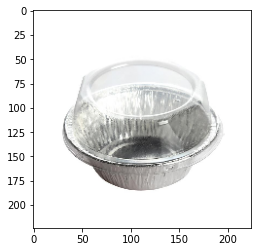

In [ ]:
import numpy as np
from urllib.request import urlopen
import cv2
import json
import matplotlib.pyplot as plt
import tensorflow as tf

load_model = tf.keras.models.load_model
model_s4 = load_model('/content/model/weights_best_s4_50.h5')

with open('map_cls.json', 'r') as fp:
    label_map = json.load(fp)

dim = (224,224)
# # from urllib.request import urlopen
def url_to_image(url, readFlag=cv2.IMREAD_COLOR):
    # download the image, convert it to a NumPy array, and then read
    # it into OpenCV format
    resp = urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, readFlag)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # return the image
    return image


im = url_to_image('https://aumento.officemate.co.th/media/catalog/product/O/F/OFM0005458.jpg')
im = cv2.resize(im,dim)
im = im.reshape(1,224,224,3)
im = im / 255.



print(im.shape)
plt.imshow(im[0])

In [ ]:
ans = model_s4.predict(im)
ans = list(map(np.vectorize(label_map.get), str(np.argmax(ans, axis=-1)[0])))
ans[0].tolist()

'foil'

In [ ]:


# label_map

'foil'